INPUT POINTS PROJECTIVE TRANSFORMATION: [[1290.  928.]
 [1259. 1016.]
 [1128.  981.]
 [1166.  900.]]
OUTPUT POINTS PROJECTIVE TRANSFORMATION: [[1144. 1025.]
 [1144. 1050.]
 [1094. 1050.]
 [1094. 1025.]]
PROJECTIVE TRANSFORMATION: [[-4.13990724e+00 -8.12913693e+00  5.05635413e+03]
 [-1.10421474e+00 -8.45555145e+00  2.25749608e+03]
 [-1.50372134e-03 -6.36080438e-03  1.00000000e+00]]
VERTEX POINTS OF THE POLYGON DEFINING THE DANGEROUS AREA INSIDE THE PLATFORM: [[1130   22]
 [1193   26]
 [1314  898]
 [1228  904]]
VERTEX POINTS OF THE POLYGON DEFINING THE DANGEROUS AREA INSIDE THE MAIN TRACK: [[1198   29]
 [1351   20]
 [1420  410]
 [1323  897]]


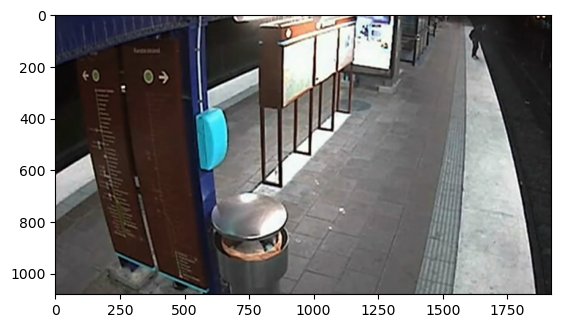

SUM INTENSITIES: 42
SUM INTENSITIES FIRST TRAIN: 24
PERSON ON MAIN TRACK: 0


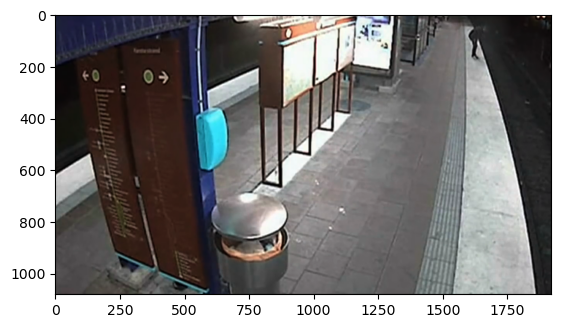

SUM INTENSITIES: 9726
SUM INTENSITIES FIRST TRAIN: 4502
PERSON ON MAIN TRACK: 0
---------------------PROXIMITY WARNING---------------------


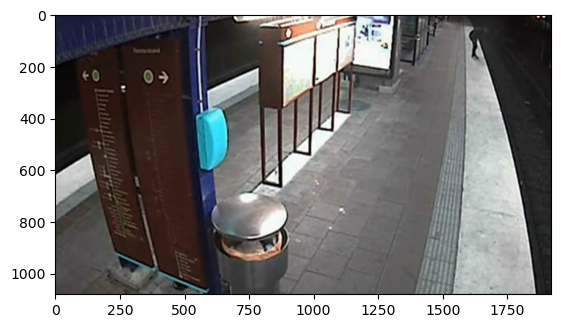

SUM INTENSITIES: 2029
SUM INTENSITIES FIRST TRAIN: 4375
PERSON ON MAIN TRACK: 0


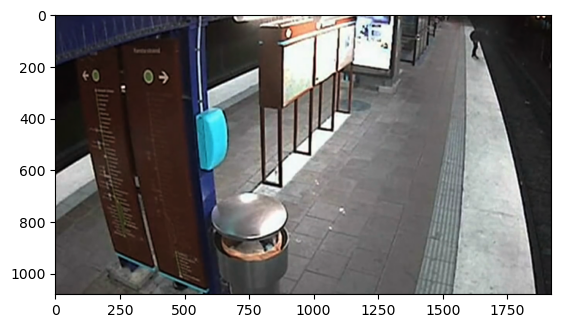

SUM INTENSITIES: 8358
SUM INTENSITIES FIRST TRAIN: 5223
PERSON ON MAIN TRACK: 0


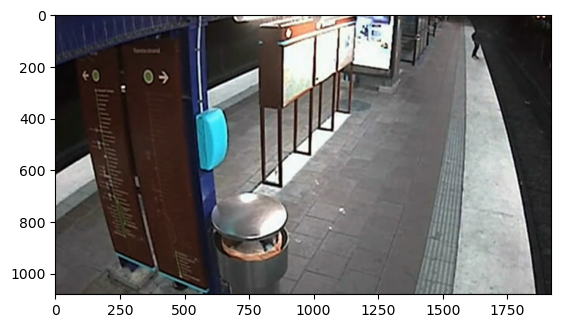

SUM INTENSITIES: 10510
SUM INTENSITIES FIRST TRAIN: 1548
PERSON ON MAIN TRACK: 0
---------------------PROXIMITY WARNING---------------------


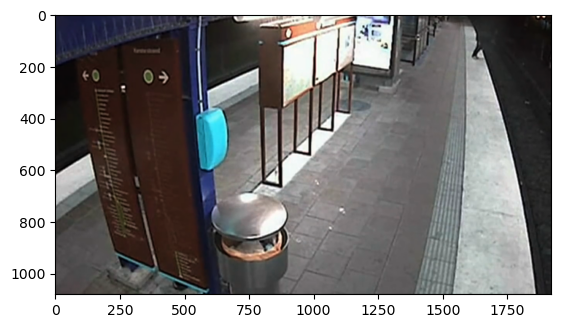

SUM INTENSITIES: 11684
SUM INTENSITIES FIRST TRAIN: 6962
PERSON ON MAIN TRACK: 0
---------------------PROXIMITY WARNING---------------------


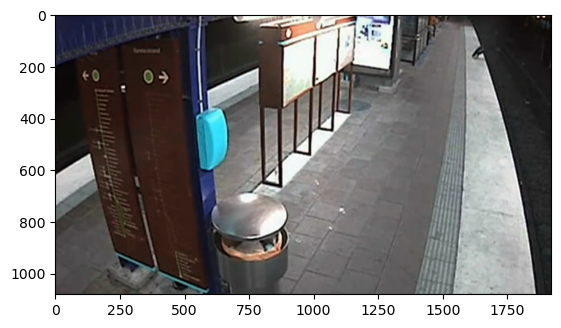

SUM INTENSITIES: 8565
SUM INTENSITIES FIRST TRAIN: 8357
PERSON ON MAIN TRACK: 1
---------------------PERSON ON THE MAIN TRACK---------------------


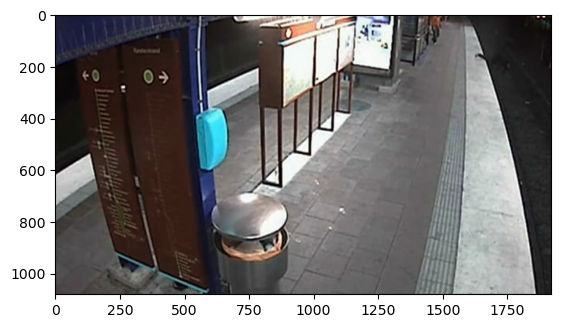

SUM INTENSITIES: 4084
SUM INTENSITIES FIRST TRAIN: 5110
PERSON ON MAIN TRACK: 0


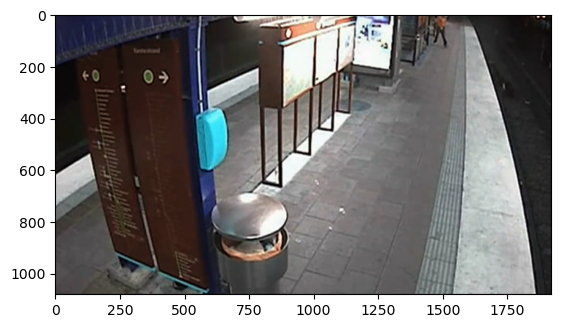

SUM INTENSITIES: 1554
SUM INTENSITIES FIRST TRAIN: 3841
PERSON ON MAIN TRACK: 0



KeyboardInterrupt



In [2]:
import cv2 
import mediapipe as mp
import torch
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import arccos, array
from numpy.linalg import norm
from PIL import Image as im 


def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)




def click_event(event, x, y, flags, params): 
	
	if event == cv2.EVENT_LBUTTONDOWN: 

		
		
		points.append([x,y,1])
        
        
        

		
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(current_frame,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the projective transformation', current_frame) 

	
	if event==cv2.EVENT_RBUTTONDOWN: 

		
		print(x, ' ', y) 
        
		
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the projective transformation', current_frame)
        
        
def click_event_dangerous_area(event, x, y, flags, params): 
	
	if event == cv2.EVENT_LBUTTONDOWN: 

		 
		
		points.append([x,y,1])
        
        
        

		
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(out,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the dangerous area inside the platform',out) 

	
	if event==cv2.EVENT_RBUTTONDOWN: 

		
		print(x, ' ', y) 
        
		 
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the dangerous area inside the platform', out)
        
        

def click_event_dangerous_area_main_track(event, x, y, flags, params): 
	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		
		
		points.append([x,y,1])
        
        
        

		
		font = cv2.FONT_HERSHEY_SIMPLEX 
        
		cv2.circle(out,(x,y),2,(0,0,255), thickness=1)
		cv2.imshow('Select 4 points to compute the area inside the main track',out) 

	
	if event==cv2.EVENT_RBUTTONDOWN: 

		
		print(x, ' ', y) 
        
		 
		font = cv2.FONT_HERSHEY_SIMPLEX 

		b = current_frame[y, x, 0] 
		g = current_frame[y, x, 1] 
		r = current_frame[y, x, 2] 
		
		cv2.imshow('Select 4 points to compute the area inside the main track', out)
        

        
        





 
fgbg1 = cv2.createBackgroundSubtractorMOG2(5); 


cap = cv2.VideoCapture('train_accident1.mp4');

    

    


fps = cap.get(cv2.CAP_PROP_FPS)
skip=int(fps /4)
nFrame=0
points=[]





ret, current_frame = cap.read()
previous_frame = current_frame






points=[]

first_frame= current_frame

if ret:
    #cv2.imshow('Select 4 points to compute the projective transformation', current_frame) 
    #cv2.setMouseCallback('Select 4 points to compute the projective transformation', click_event) 
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows() 
    
    



    #input_pts = np.float32([[points[0][0],points[0][1]],[points[1][0],points[1][1]],[points[2][0],points[2][1]],[points[3][0],points[3][1]]])
    output_pts = np.float32([[1144,  1025],[1144,  1050],[1094, 1050],[1094,  1025]])
    
    
    input_pts=np.float32([[1290,  928],[ 1259,  1016],[ 1128,  981],[1166,  900]])
    
    print("INPUT POINTS PROJECTIVE TRANSFORMATION: {}".format(input_pts))
    print("OUTPUT POINTS PROJECTIVE TRANSFORMATION: {}".format(output_pts))
    
 
    # Compute the perspective transform M
    M = cv2.getPerspectiveTransform(input_pts,output_pts)
    
    print("PROJECTIVE TRANSFORMATION: {}".format(M))
 
    # Apply the perspective transformation to the image
    out = cv2.warpPerspective(current_frame,M,(current_frame.shape[1]+200, current_frame.shape[0]+50),flags=cv2.INTER_LINEAR)
    
    

    points=[]
    #cv2.imshow('Select 4 points to compute the dangerous area inside the platform', out) 
    #cv2.setMouseCallback('Select 4 points to compute the dangerous area inside the platform', click_event_dangerous_area) 
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows() 
    
    
    
    #points = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], [points[2][0],points[2][1]],[points[3][0],points[3][1]]])
    
    points=np.array([[1130,22],[1193,26],[1314,898],[1228,904]])
    
    
    dangerous_area = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]], np.int32)
    
    
    dangerous_area_points = np.array([[[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]]])
    
    print("VERTEX POINTS OF THE POLYGON DEFINING THE DANGEROUS AREA INSIDE THE PLATFORM: {}".format(points))
    
 
    #cv2.fillPoly(out, pts=[points], color=(0, 255, 0))
    
    #cv2.imshow('Dangerous area inside the platform', out) 
 
    #cv2.waitKey(0)

    #cv2.destroyAllWindows()
    
    
    
    
    
    points=[]
    #cv2.imshow('Select 4 points to compute the area inside the main track', out) 
    #cv2.setMouseCallback('Select 4 points to compute the area inside the main track', click_event_dangerous_area_main_track) 
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows() 
    
    
    
    #points = np.array([[points[0][0],points[0][1]], [points[1][0],points[1][1]], [points[2][0],points[2][1]],[points[3][0],points[3][1]]])
    points=np.array([[1198,29],[1351,20],[1420,410],[1323,897]])
    
   

    
    dangerous_area_main_track_points = np.array([[[points[0][0],points[0][1]], [points[1][0],points[1][1]], 
                                [points[2][0],points[2][1]], [points[3][0],points[3][1]]]])
    
    
    print("VERTEX POINTS OF THE POLYGON DEFINING THE DANGEROUS AREA INSIDE THE MAIN TRACK: {}".format(points))
    #cv2.fillPoly(out, pts=[points], color=(0, 0, 255))
    
    #cv2.imshow('Dangerous area inside main track', out) 
 
    #cv2.waitKey(0)

    #cv2.destroyAllWindows()
    
    
    
    


    

    
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break
        
    if nFrame % skip == 0:
        
        cv2.waitKey(1000)
        # apply mask for background subtraction 
        fgmask1 = fgbg1.apply(frame); 
        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]

        frame = gammaCorrection(frame, 0.8)
        person_on_main_track=0
        person_on_second_track=0
        
        
        
        plt.imshow(frame)
        %matplotlib inline

        plt.show()

        #cv2.imshow('Original', frame); 
       

        _, frame_diff = cv2.threshold(fgmask1,250,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        transformed_frame_diff=cv2.warpPerspective(frame_diff,M,(frame_diff.shape[1]+200, frame_diff.shape[0]+400),flags=cv2.INTER_LINEAR)
        cv2.imshow('frame difference ',transformed_frame_diff) 
        
        
        
        height = transformed_frame_diff.shape[0]
        width = transformed_frame_diff.shape[1]
        mask = np.zeros((height, width), dtype=np.uint8)





        cv2.fillPoly(mask, dangerous_area_points, (255))

        res = cv2.bitwise_and(transformed_frame_diff,transformed_frame_diff,mask = mask)

        rect = cv2.boundingRect(dangerous_area_points)
        cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
       
        totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(cropped,4,cv2.CV_32S)
        maxArea=0
        maxIndex=0
        for i in range(1, totalLabels): 
            area = values[i, cv2.CC_STAT_AREA]   

            if area > maxArea:
                maxArea=area
                maxIndex=i


        sum_intensities=maxArea
        
        cv2.imshow('dangerous area in the platform',cropped)

        print("SUM INTENSITIES: {}".format(sum_intensities))
     
        
        cv2.fillPoly(mask, dangerous_area_main_track_points, (255))

        res = cv2.bitwise_and(transformed_frame_diff,transformed_frame_diff,mask = mask)

        rect = cv2.boundingRect(dangerous_area_main_track_points)
        cropped_main_track = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]



        totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(cropped_main_track, connectivity=4)

        maxArea=0
        maxIndex=0
        for i in range(1, totalLabels): 
            area = values[i, cv2.CC_STAT_AREA] 
            
            if area > 7000:
                person_on_main_track=1

            if area > maxArea:
                maxArea=area
                maxIndex=i


        sum_intensities_main_track=maxArea
        
        cv2.imshow('dangerous area main track',cropped_main_track)

        print("SUM INTENSITIES FIRST TRAIN: {}".format(sum_intensities_main_track))
        
        
        print("PERSON ON MAIN TRACK: {}".format(person_on_main_track))
        
       


        #cv2.imshow('dangerous area secondary track',cropped_secondary_track)


        
        people_beyond_yellow_line=sum_intensities > 9000;
        
       

        train_main_track=sum_intensities_main_track > 90000;
 

        
        if person_on_main_track==1 and not train_main_track:

            #cv2.waitKey(2000)
            text = "Person on the main track alarm"
            coordinates = (100,100)
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale =1
            color = (255,0,0)
            thickness = 2
            dangerous_situation = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
            cv2.imshow('Original', dangerous_situation)
            #cv2.waitKey(1000)
            #cv2.destroyAllWindows()
            print("---------------------PERSON ON THE MAIN TRACK---------------------")
            
        elif people_beyond_yellow_line and not train_main_track:

            #cv2.waitKey(2000)
            text = "Proximity warning"
            coordinates = (100,100)
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale =1
            color = (255,0,0)
            thickness = 2
            dangerous_situation = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
            cv2.imshow('Original', dangerous_situation)
            #cv2.waitKey(1000)
            #cv2.destroyAllWindows()
            print("---------------------PROXIMITY WARNING---------------------")
            
        else:
            cv2.imshow('Original', frame); 
            
        
       
        

    
    nFrame=nFrame+1          
cap.release()
cv2.destroyAllWindows()
    